# Non-Hierarchical Clustering: Comparison between K-Means and DBSCAN

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data. In other words, cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

Hierarchical clustering (also known as connectivity-based clustering) is based on the core idea of objects being more related to nearby objects than to objects farther away. These algorithms connect "objects" to form "clusters" based on their distance.

K-Means (centroid-based clustering) and Density-Based Spatial Clustering of Applications with Noise (density-based clustering) are both categorized as non-hierarchical clustering methods.

## 1. Euclidean Distance

One common technique to determine clustering is to look for clusters of points by using a metric, or distance measure.

Distance measures have following properties: Non negative, Self-proximity, Symmetry, and Triangle inequality.

For example, one can use the [Euclidean Metric](https://en.wikipedia.org/wiki/Euclidean_distance) when all the data have the same units (such as distance) and dimensions. Other distance measures can be used in other cases to determine closeness or similarity, such as [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity). Selection of an appropriate metric, especially for high dimensional data, is an important topic since we want to avoid the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

For this demonstration, we will primarily focus on Euclidean metric.

Limitations of Euclidean metric:
1. Normalization (Standardization) required;
2. Independence of measurements: if two or more variables are correlated, the axes are no longer at right angles (see [Mahalonobis distance](https://www.statisticshowto.datasciencecentral.com/mahalanobis-distance/));
3. Outliers: It is a matter of signal-to-noise. Euclidean distance, due to the squared terms, is particular sensitive to noise; but even Manhattan distance and "fractional" (non-metric) distances suffer. (see [Manhattan Distance](https://en.wikipedia.org/wiki/Taxicab_geometry)).

## 2. K-Means Algorithm

Step 1 - Pick K random points as cluster centers called centroids.<br />
Step 2 - Assign each x_ix i to nearest cluster by calculating its distance to each centroid.<br />
Step 3 - Find new cluster center by taking the average of the assigned points.<br />
Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.<br />

## 3. DBSCAN Algorithm

Step 1 - Pick a point at random that has not been assigned to a cluster or been designated as an outlier. Compute its neighborhood to determine if it’s a core point. If yes, start a cluster around this point. If no, label the point as an outlier.<br />
Step 2 - Once we find a core point and thus a cluster, expand the cluster by adding all directly-reachable points to the cluster. Perform “neighborhood jumps” to find all density-reachable points and add them to the cluster. If an an outlier is added, change that point’s status from outlier to border point.<br />
Step 3 - Repeat these two steps until all points are either assigned to a cluster or designated as an outlier.<br />

## 4. Comparison between K-Means Algorithm and DBSCAN Algorithm

DBSCAN's advantages compared to K-Means:
1. DBSCAN does not require pre-specified input of the number of cluster while K-Means does.<br />
2. DBSCAN can find arbitrarily shaped clusters, while k-means algorithm is good in capturing structure of the data if clusters have a spherical-like shape.<br />
3. DBSCAN has a notion of noise, and is robust to outliers.<br />

DBSCAN's disadvantages compared to K-Means:
1. The performance of DBSCAN depends heavily on the parameter values.
2. DBSCAN cannot cluster data sets well with large differences in densities, since the minPts-epsilon combination cannot then be chosen appropriately for all clusters.
3. DBSCAN is not entirely deterministic: border points that are reachable from more than one cluster can be part of either cluster, depending on the order the data are processed.
4. Like K-means, DBSCAN is scalable, but using it on very large datasets requires more memory and computing power.

## 5. Example

In this example, we will examine both of these algorithms, using random generated clusters.

### 5.1 Data Preparation

In [1]:
# Import modules
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
warnings.filterwarnings("ignore")

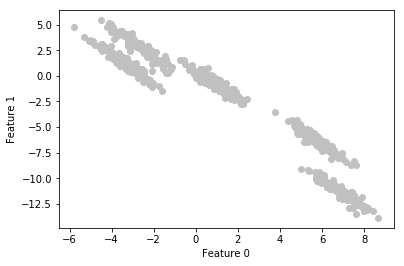

In [2]:
# Generate random clusters
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)

# Transform data
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Plot
plt.scatter(X[:, 0], X[:, 1], c="silver")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### 5.2 DBSCAN

[-1  0  1  2  3  4]
[(-1, 'silver'), (0, 'gold'), (1, 'red'), (2, 'blue'), (3, 'green'), (4, 'purple')]


Text(0.5, 1.0, 'DBSCAN')

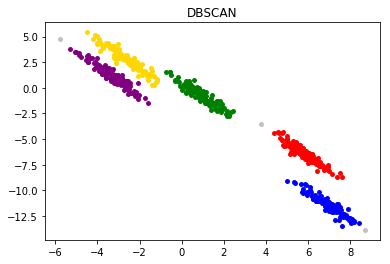

In [3]:
# DBSCAN for the randomly generated cluster data above
dbsc = DBSCAN(eps = 0.55, min_samples = 5).fit(X)

# Get the cluster labels
labels = dbsc.labels_

# Identify the core and border points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

unique_labels = np.unique(labels)
print(unique_labels)
colors = ["silver", "gold", "red", "blue", "green", "purple"]
print(list(zip(unique_labels, colors)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:,0], xy[:,1], 'o', markeredgewidth=0.0, markerfacecolor=color, markersize=5)
    xy2 = X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0], xy2[:,1], 'o', markeredgewidth=0.0, markerfacecolor=color, markersize=5)
    
plt.title("DBSCAN")

### 5.3 K-Means

Inertia measures clustering quality:
1. Measures how spread out the clusters are (lower is better)
2. k-means attempts to minimize the inertia when choosing clusters
3. "Elbow Rules" to decide the optimal number of clusters

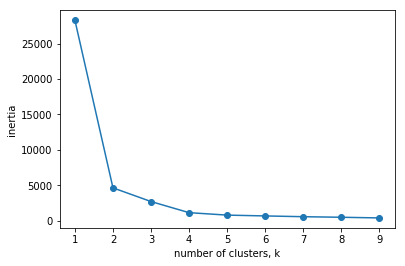

In [4]:
# Check inertia before k-means classification
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

[0 1 2 3]
[(0, 'silver'), (1, 'gold'), (2, 'red'), (3, 'blue')]


Text(0.5, 1.0, 'K-Means with four clusters')

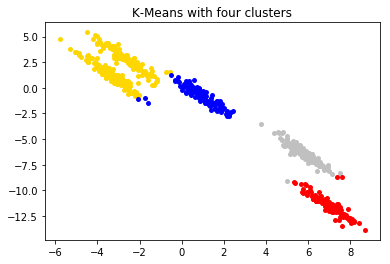

In [5]:
# k-means for the randomly generated cluster data above: number of clusters = 4 by the elbow method
from sklearn.cluster import KMeans

kmeans_moons = KMeans(n_clusters = 4).fit(X)
labels = kmeans_moons.labels_

unique_labels = np.unique(labels)
print(unique_labels)
colors = ["silver", "gold", "red", "blue", "green"]
print(list(zip(unique_labels, colors)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:,0], xy[:,1], 'o', markeredgewidth=0.0, markerfacecolor=color, markersize=5)
    xy2 = X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0], xy2[:,1], 'o', markeredgewidth=0.0, markerfacecolor=color, markersize=5)
    
plt.title("K-Means with four clusters")

[0 1 2 3 4]
[(0, 'silver'), (1, 'gold'), (2, 'red'), (3, 'blue'), (4, 'green')]


Text(0.5, 1.0, 'K-Means with five clusters')

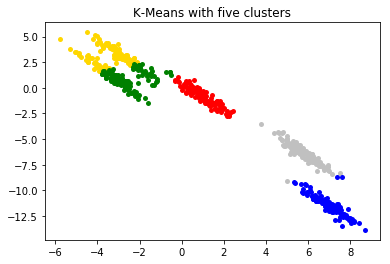

In [6]:
# k-means for the randomly generated cluster data above: number of clusters = 5 (picked the same number of clusters as DBSCAN)
from sklearn.cluster import KMeans

kmeans_moons = KMeans(n_clusters = 5).fit(X)
labels = kmeans_moons.labels_

unique_labels = np.unique(labels)
print(unique_labels)
colors = ["silver", "gold", "red", "blue", "green", "purple"]
print(list(zip(unique_labels, colors)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:,0], xy[:,1], 'o', markeredgewidth=0.0, markerfacecolor=color, markersize=5)
    xy2 = X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0], xy2[:,1], 'o', markeredgewidth=0.0, markerfacecolor=color, markersize=5)
    
plt.title("K-Means with five clusters")

### 5.4  Summary:

Both DBSCAN and k-means are applied for the randomly generated cluster data above (plots are shown below). DBSCAN generates 5 clusters with parameters eps = 0.55 and min_samples = 5. For k-means, the number of clusters are set to be 4 (according to the elbow method) and 5 (the same as DBSCAN's) to see if there is any difference between two algorithms.__
There is an obvious difference in the outputs. DBSCAN managed to separate 5 clusters, and from our visual intuition, there are clearly 5 clusters. However, k-means with number of clusters either 4 or 5 did not do the job, since there are massive amount of misclassification.

The reason behind this is because of two major differences between DBSCAN and k-means:
1. DBSCAN can find arbitrarily shaped clusters, while k-means algorithm is good in capturing structure of the data if clusters have a spherical-like shape.
2. DBSCAN has a notion of noise, and is robust to outliers.

Thus DBSCAN outperforms k-means in this particular shape of data (arbitrarily shaped with similar densities among clusters). However, the performance of DBSCAN depends heavily on the parameter values.